In [39]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_classification
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [2]:
boston=load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
bostonDF['PRICE']=boston.target
print('데이터크기',bostonDF.shape)
bostonDF.head()

데이터크기 (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
bostonDF.info()
bostonDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


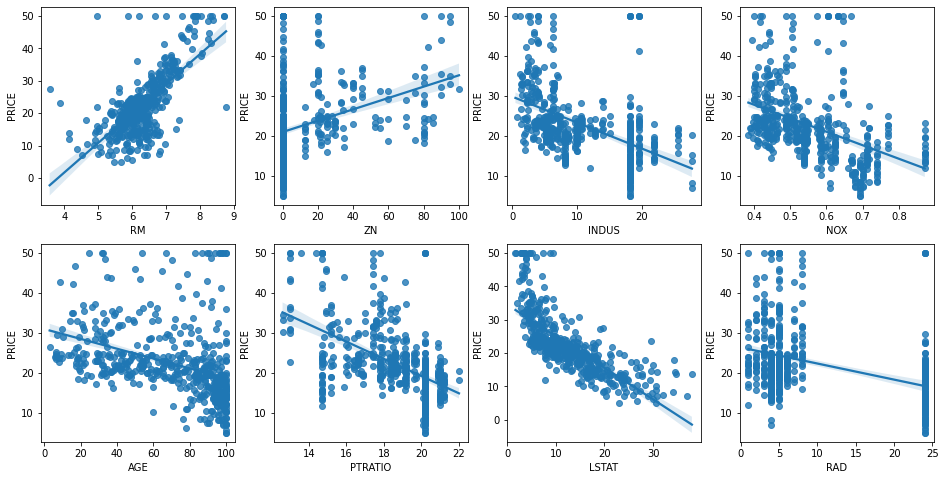

In [5]:
fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=axs[row][col])

In [6]:
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_target,test_size=0.3,random_state=156)

lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)
print('mse={0:.3f},rmse={1:.3f}'.format(mse,rmse))

mse=17.297,rmse=4.159


In [7]:
print('절편값',lr.intercept_)
print('회귀계수값',np.round(lr.coef_,1))

절편값 40.9955951721646
회귀계수값 [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [8]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=x_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr=LinearRegression()

neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5fold 개별 negative mse scores',np.round(neg_mse_scores,2))
print('5fold 개별 rmse socres',np.round(rmse_scores,2))
print('5fold 평균 rmse {0:.3f}'.format(avg_rmse))

5fold 개별 negative mse scores [-12.46 -26.05 -33.07 -80.76 -33.31]
5fold 개별 rmse socres [3.53 5.1  5.75 8.99 5.77]
5fold 평균 rmse 5.829


In [22]:
bostonDF = pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF['PRICE'] = boston .target
print('Boston 데이터 크기', bostonDF.shape)

y_target=bostonDF['PRICE']
x_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)

Boston 데이터 크기 (506, 14)


In [26]:
ridge=Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5fold 개별 Negative MSE scores', np.round(neg_mse_scores,3))
print('5fold 개별 RMSE scores', np.round(rmse_scores,3))
print('5fold 평균 RMSE:{0:.3f}'.format(avg_rmse))

5fold 개별 Negative MSE scores [-11.422 -24.294 -28.144 -74.599 -28.517]
5fold 개별 RMSE scores [3.38  4.929 5.305 8.637 5.34 ]
5fold 평균 RMSE:5.518


In [28]:
alphas=[0, 0.1, 1, 10, 100]
for a in alphas:
    ridge=Ridge(alpha=a)
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha={0}일때 5fold의 평균RMSE:{1:.3f}'.format(a,avg_rmse))
    

alpha=0일때 5fold의 평균RMSE:5.829
alpha=0.1일때 5fold의 평균RMSE:5.788
alpha=1일때 5fold의 평균RMSE:5.653
alpha=10일때 5fold의 평균RMSE:5.518
alpha=100일때 5fold의 평균RMSE:5.330


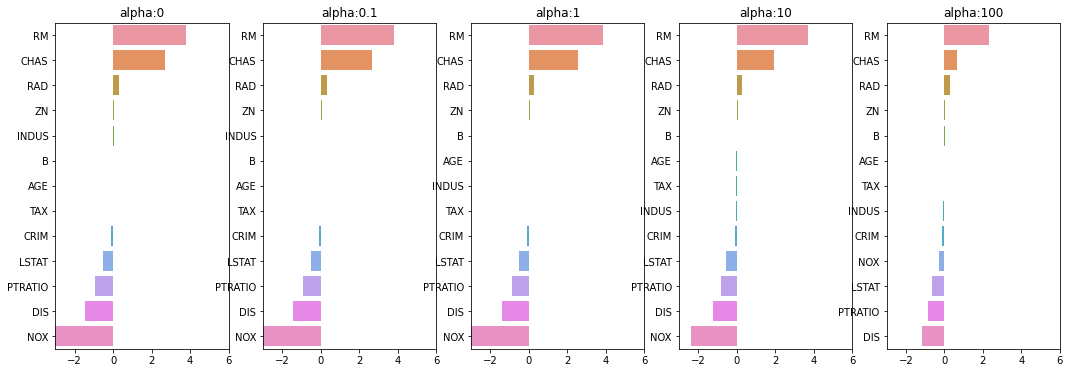

In [35]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df=pd.DataFrame()
for a, b in enumerate(alphas):
    ridge = Ridge(alpha = b)
    ridge.fit(x_data, y_target)
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)
    colname='alpha:'+str(b)
    coeff_df[colname]=coeff
    coeff=coeff.sort_values(ascending=False)
    axs[a].set_title(colname)
    axs[a].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[a])
plt.show()

In [38]:
ridge_alphas=[0,0.1,1,10,100]
sort_column='alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [45]:
def get(model_name,params=None,x_data_n=None,y_target_n=None,verbose=True,return_coeff=True):
    coeff_df=pd.DataFrame()
    if verbose : print('##### ',model_name, '#####')
    for param in params:
        if model_name == 'Ridge':
            model=Ridge(alpha=param)
        elif model_name == 'Lasso':
            model=Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model=ElastciNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(ridge, x_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha:{0}일때 5폴드 세트 평균 RMSE:{1:.3f}'.format(param,avg_rmse))
        model.fit(x_data_n,y_target_n)
        if return_coeff:
            coeff=pd.Series(data=model.coef_,index=x_data_n.columns)
            colname='alpha:'+str(param)
            coeff_df[colname]=coeff
    return coeff_df

In [47]:
lasso_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df=get('Lasso', params=lasso_alphas,x_data_n=x_data,y_target_n=y_target)

#####  Lasso #####
alpha:0.07일때 5폴드 세트 평균 RMSE:5.330
alpha:0.1일때 5폴드 세트 평균 RMSE:5.330
alpha:0.5일때 5폴드 세트 평균 RMSE:5.330
alpha:1일때 5폴드 세트 평균 RMSE:5.330
alpha:3일때 5폴드 세트 평균 RMSE:5.330
